# Classification

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from preprocessing import *
from config import *
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
np.random.seed(42)

## Load data

In [11]:
track_length = 16

In [12]:
y = np.load(rf'data_files\labels_All{track_length}.npy')
x = np.load(rf'data_files\features_All{track_length}.npy')
print(x.shape, y.shape)

(29808, 16, 5) (29808,)


In [22]:
y2treat = pd.Series(y).map(wells_to_genetype_dict)
y2treat = pd.DataFrame(y2treat)

<AxesSubplot:xlabel='0'>

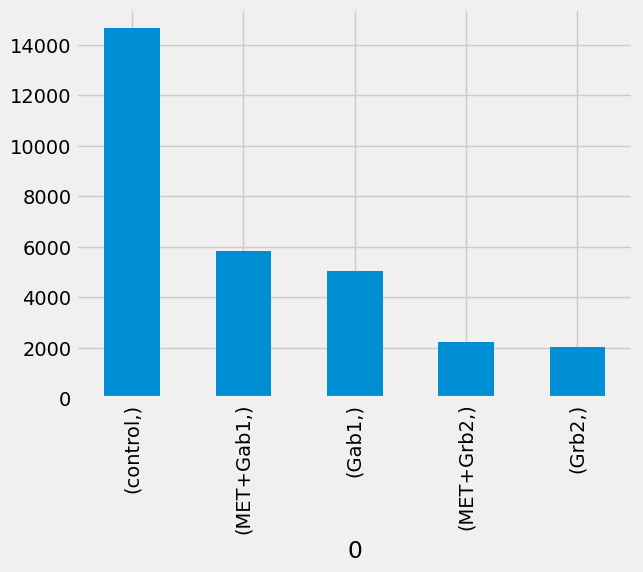

In [23]:
y2treat.value_counts().plot.bar()

In [43]:
y2treat.groupby(0).size().min()

2017

In [36]:
y_treat_sample = y2treat.groupby(0).sample(2000)
y_sample.shape

(10000, 1)

In [39]:
y_sample = y[y_treat_sample.index.values]
y_sample.shape

(10000,)

In [40]:
x_sample = x[y_treat_sample.index.values]
x_sample.shape

(10000, 16, 5)

In [45]:
np.save('x_balanced_sample_16.npy',x_sample)
np.save('y_balanced_sample_16.npy',y_sample)

## Normalize

In [42]:
x_norm , scaler= normalize_axis(x_sample)
x_norm.shape

(10000, 16, 5)